# Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
pd.set_option('display.max.column',40)

In [2]:
df = pd.read_csv(r'..\datasets\IBM_HR\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
df.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
TARGET_COL = 'Attrition'

# EDA

## Target Distribution

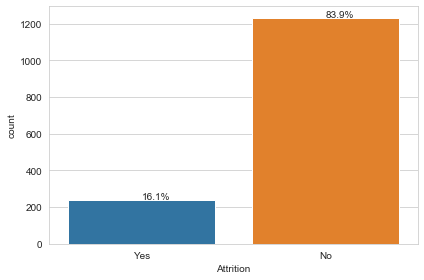

In [8]:
sns.set_style('whitegrid')
ax = sns.countplot(df[TARGET_COL])
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/df.shape[0]*100), (p.get_x()+0.4, p.get_height()+5))
# plt.legend(True)        
plt.tight_layout()   

## Numerical Columns

In [9]:
num_cols = list(df.select_dtypes(exclude='O').columns)
num_cols.remove('EmployeeCount')
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

###  Cat plots

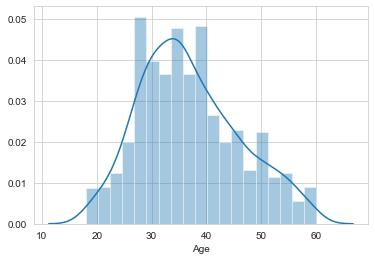

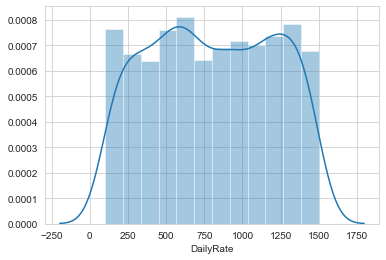

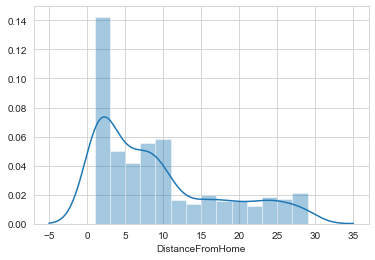

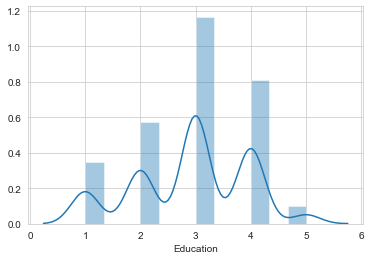

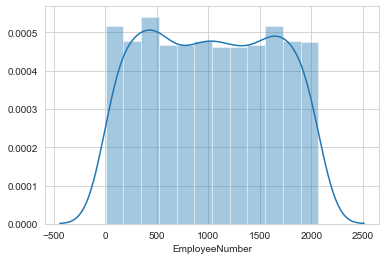

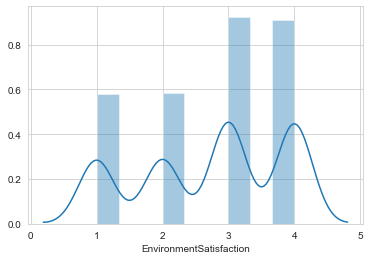

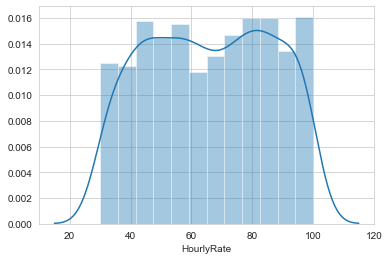

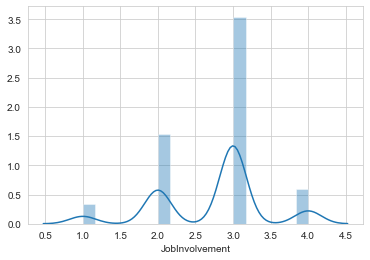

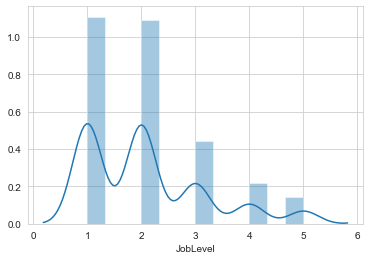

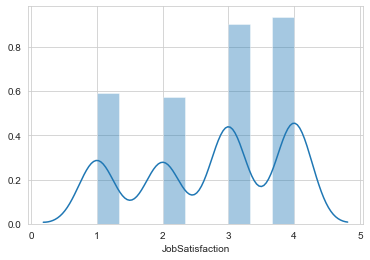

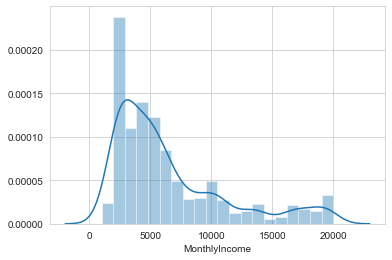

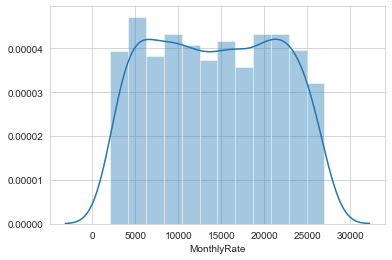

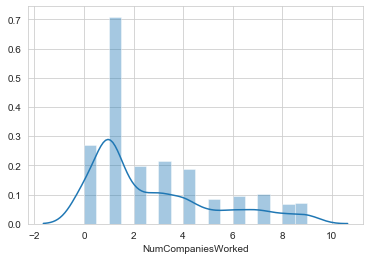

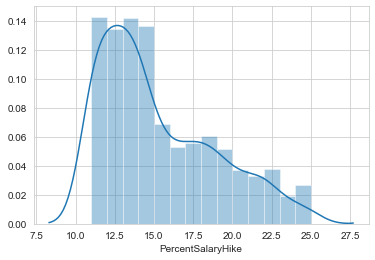

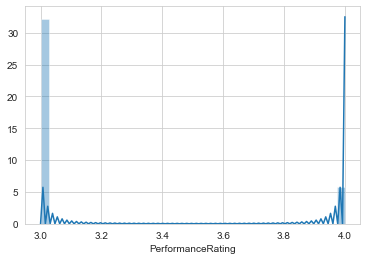

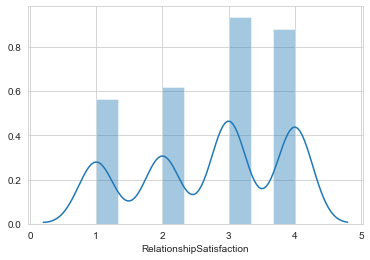

C:\Users\ADMIN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ADMIN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


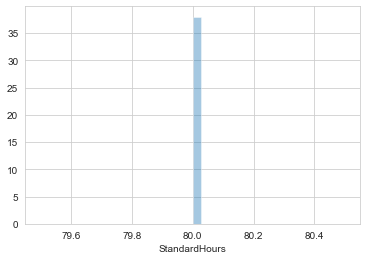

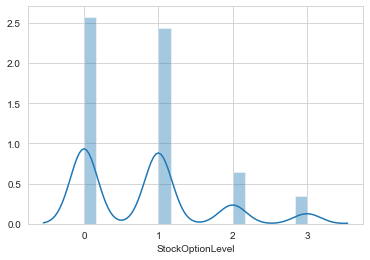

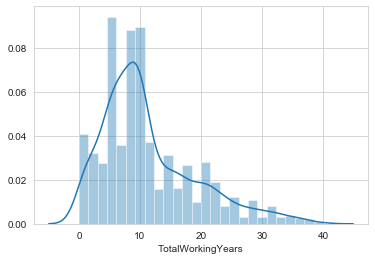

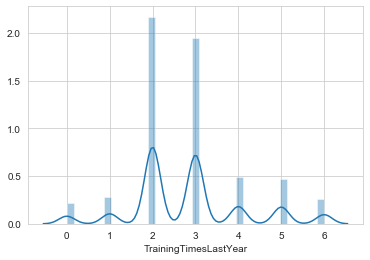

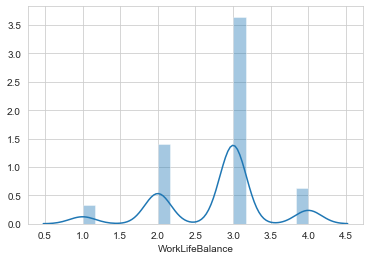

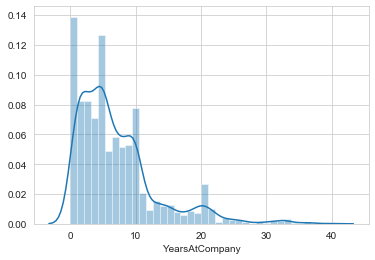

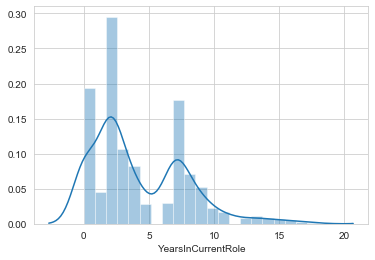

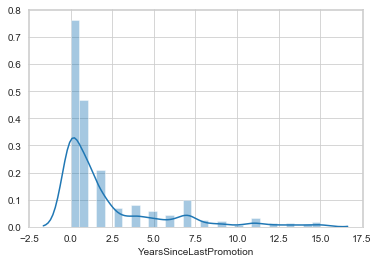

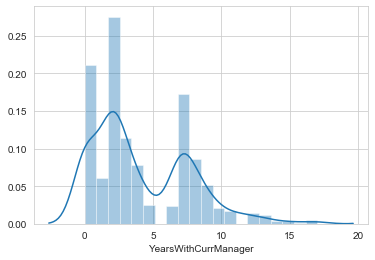

In [10]:
for col in num_cols:
    sns.distplot(df[col])
    plt.show()

C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


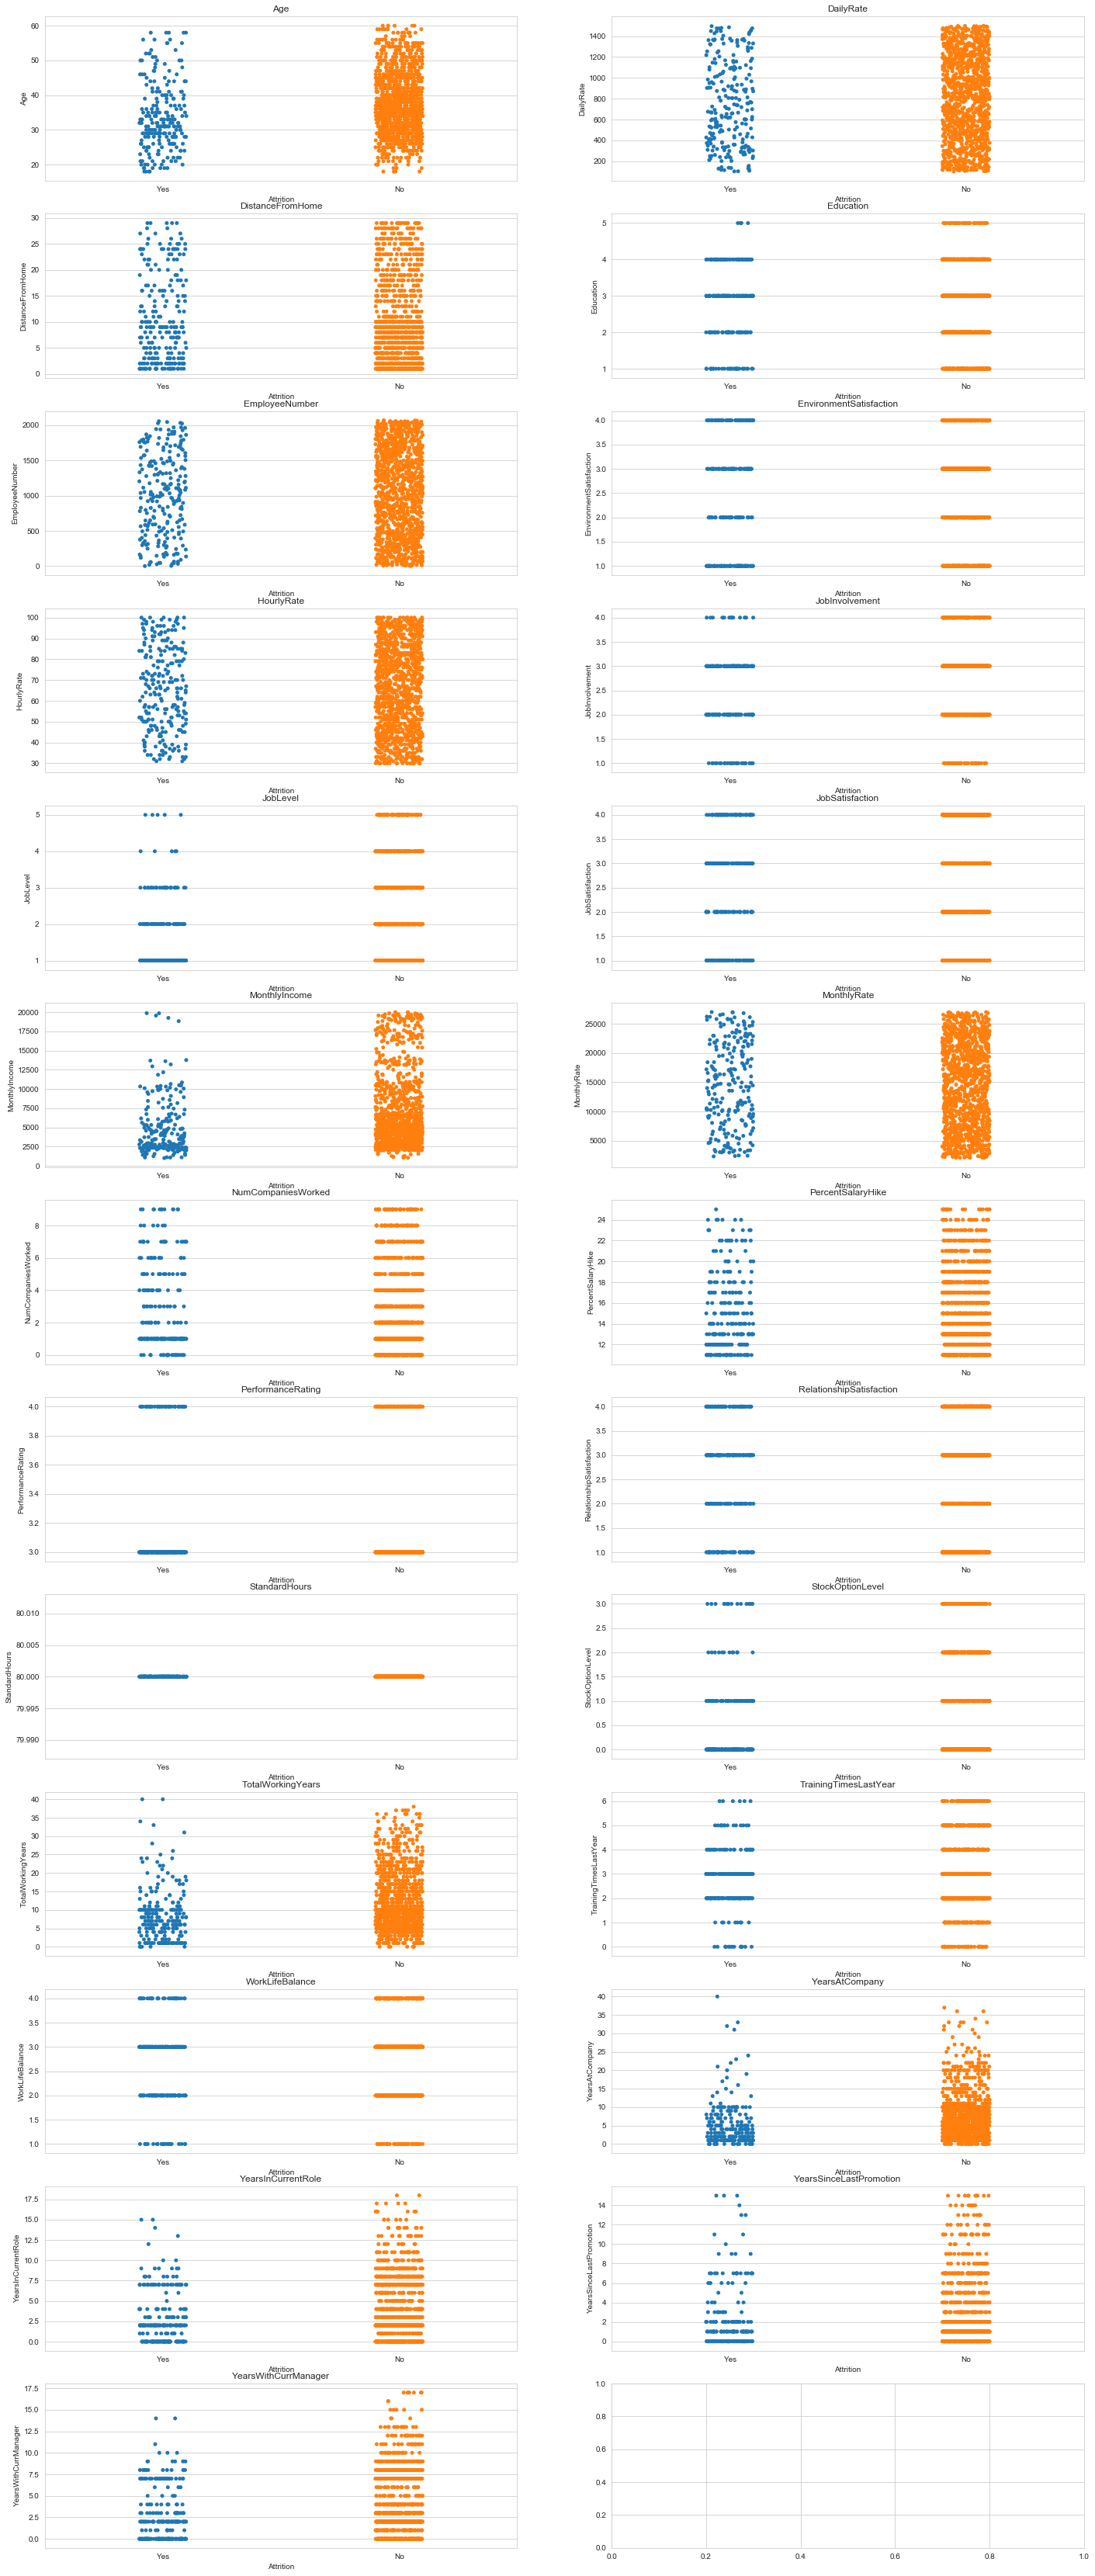

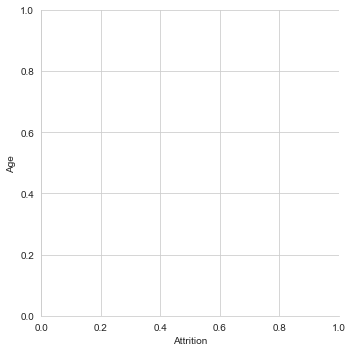

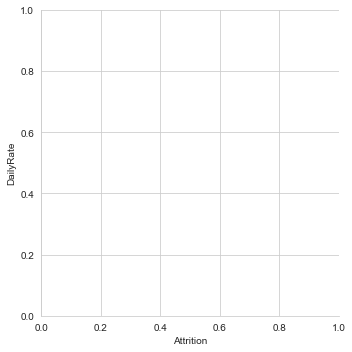

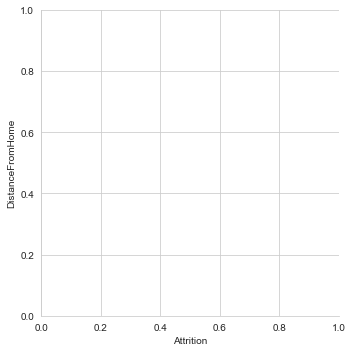

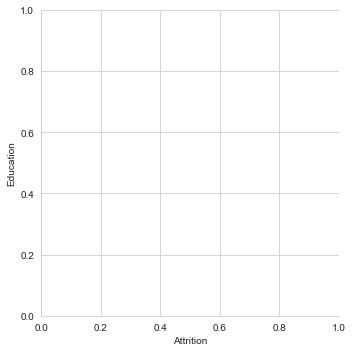

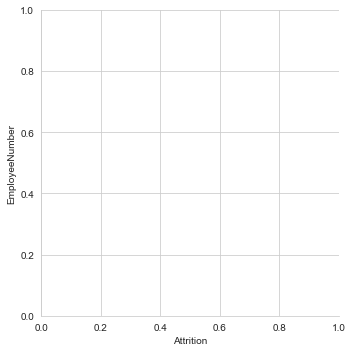

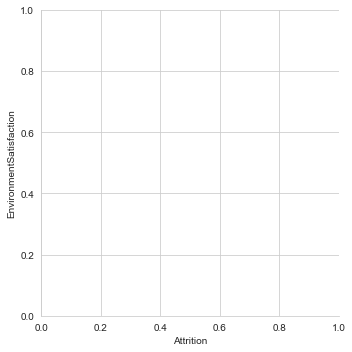

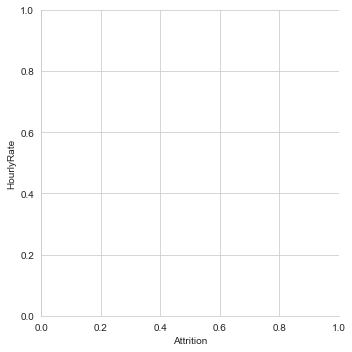

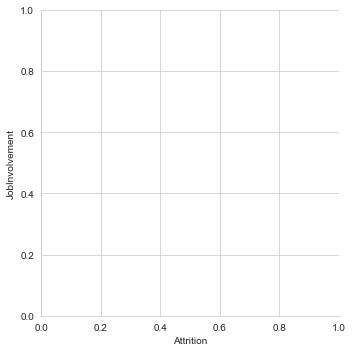

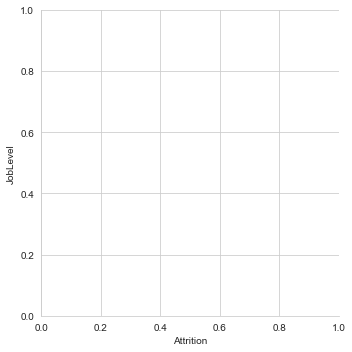

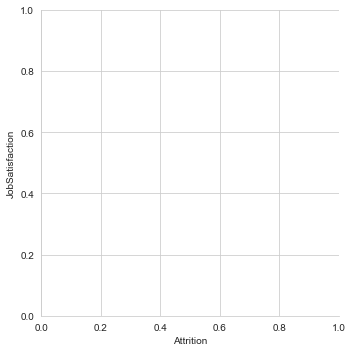

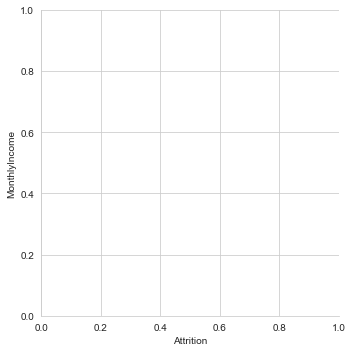

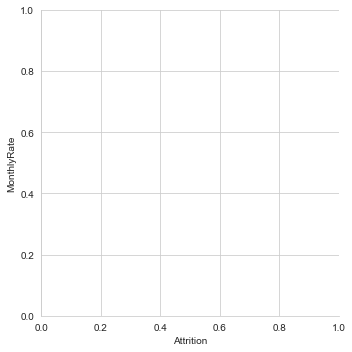

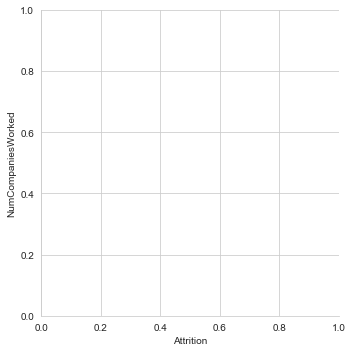

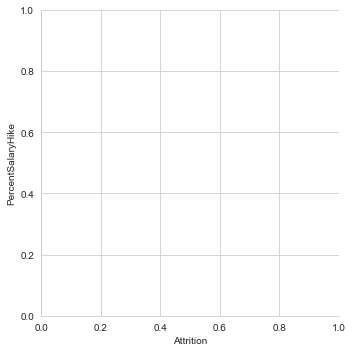

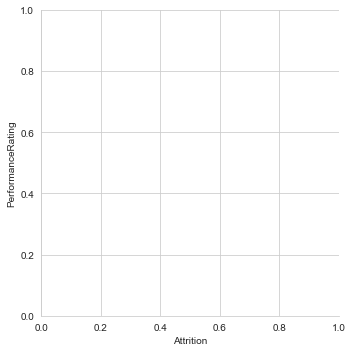

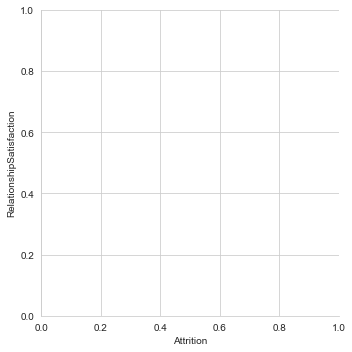

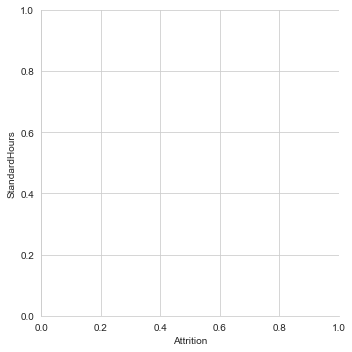

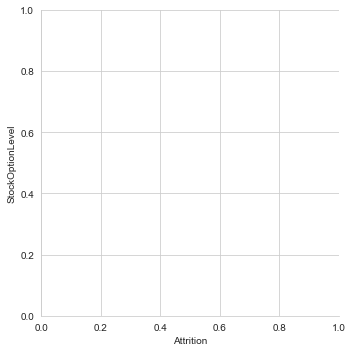

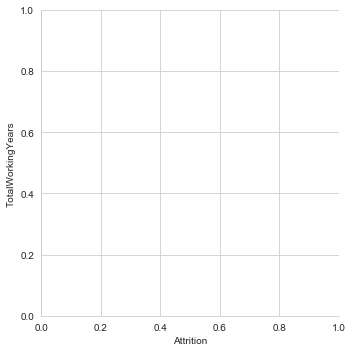

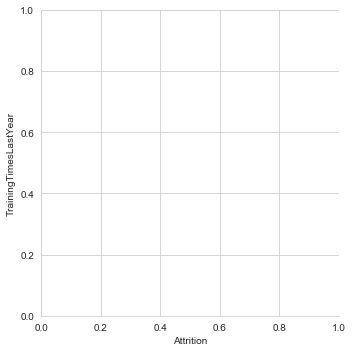

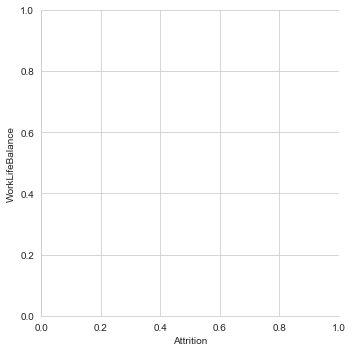

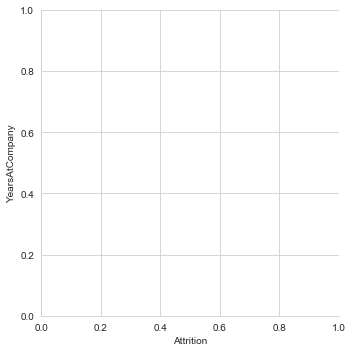

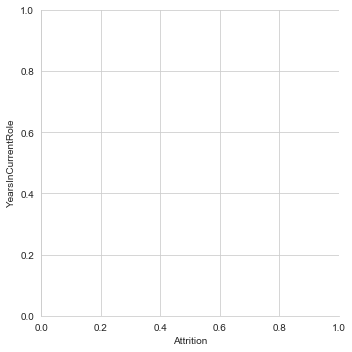

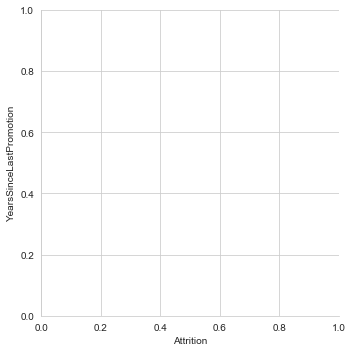

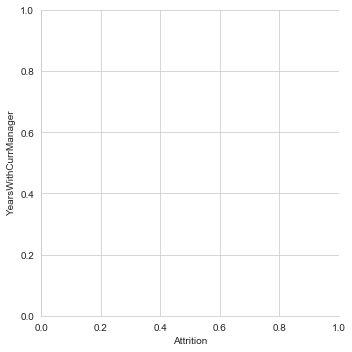

In [11]:
%matplotlib inline
fig,axes = plt.subplots(13,2,figsize=(24,60))
axs = [ax for axes_row in axes for ax in axes_row]
for i,col in enumerate(num_cols): 
    sns.catplot(x=TARGET_COL,y=col,data=df,ax=axs[i])
    axs[i].set_title(f'{col}')
plt.tight_layout()
plt.show()

### Box plots

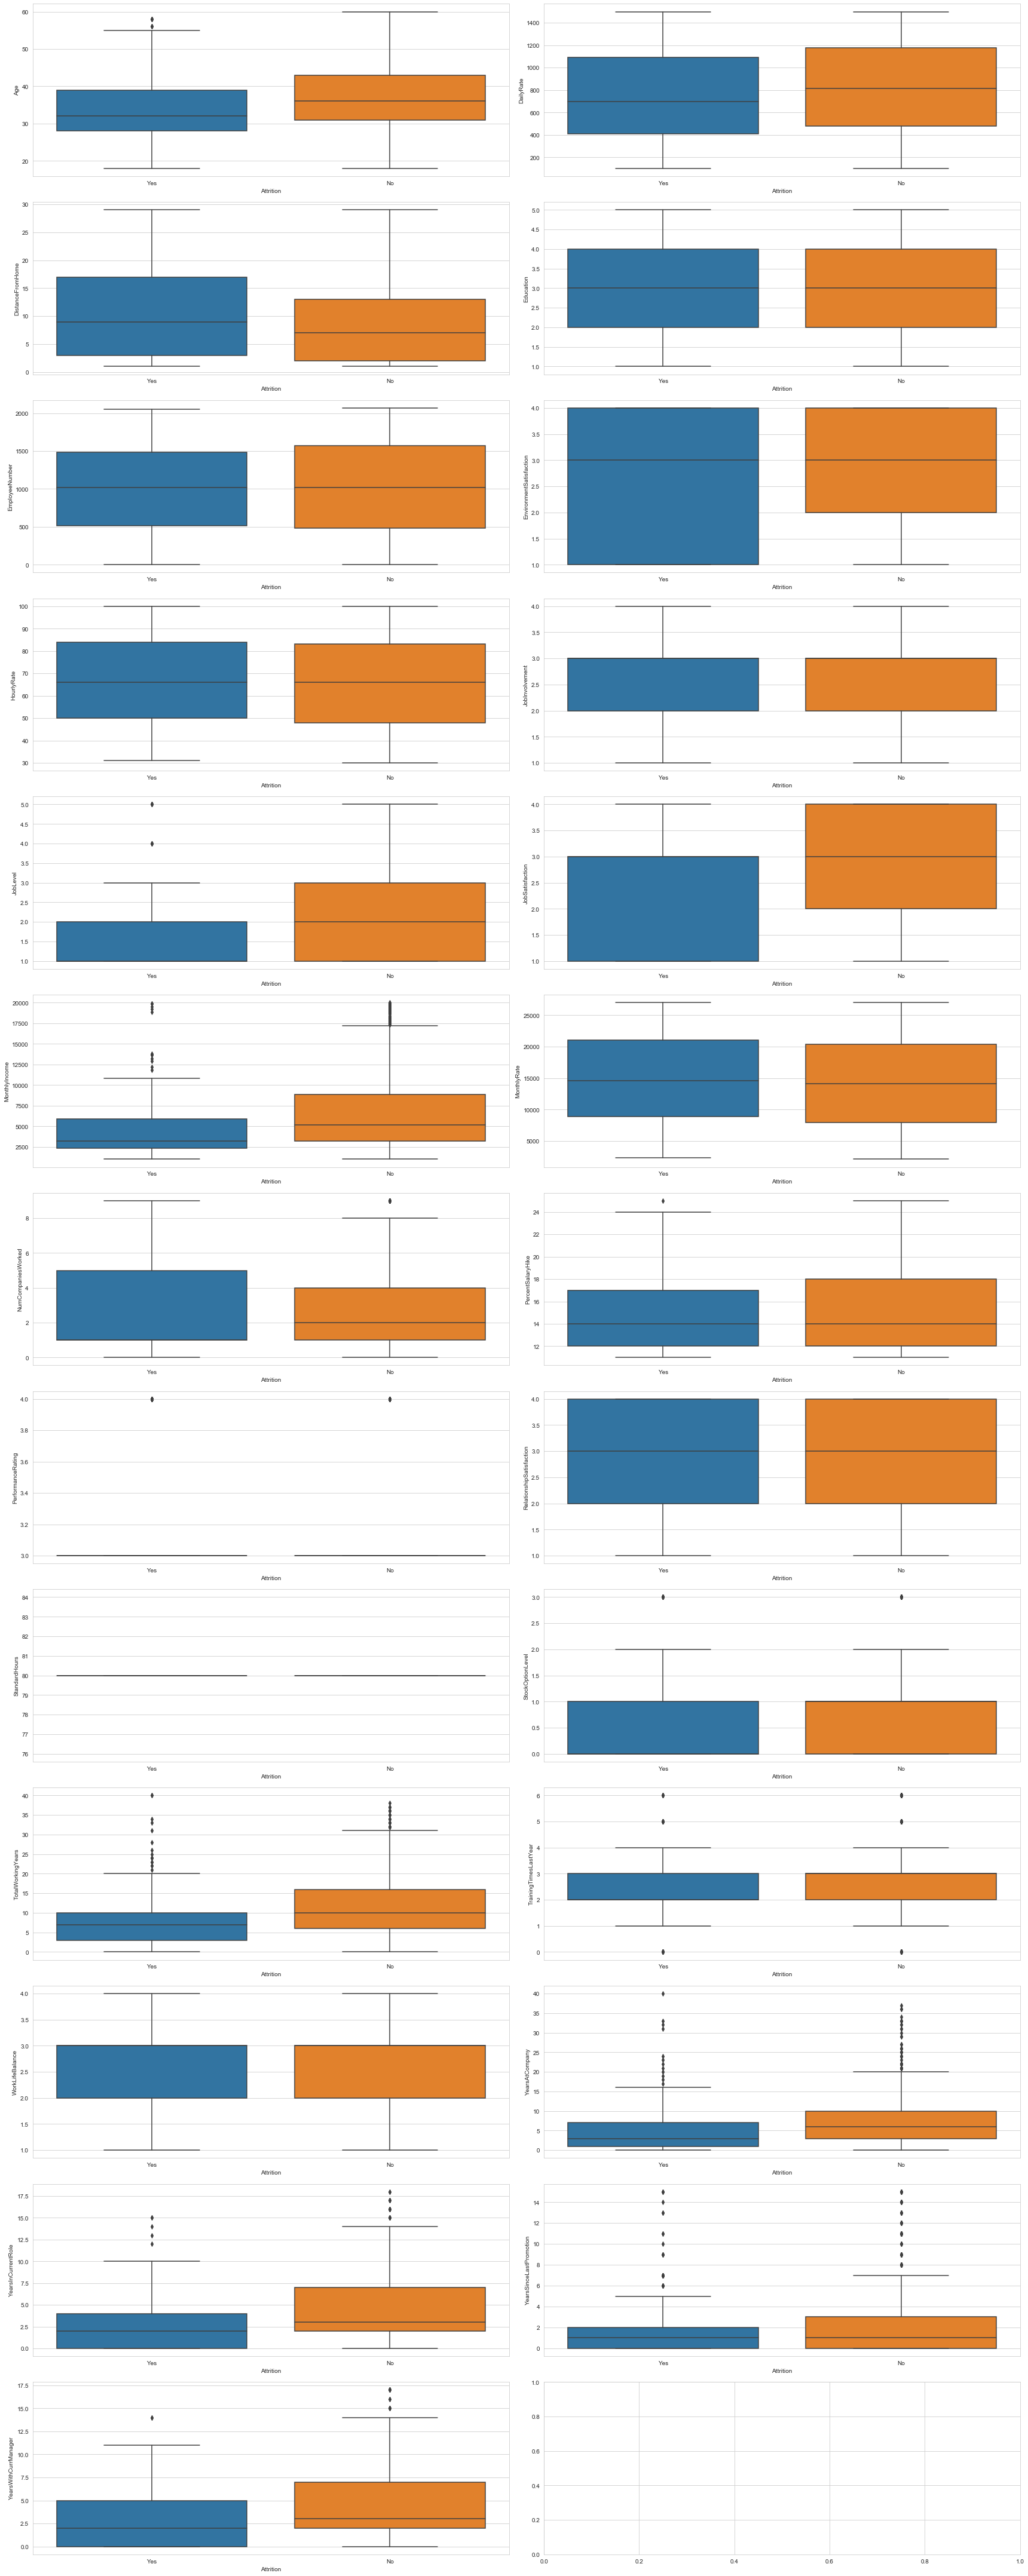

In [12]:
%matplotlib inline
fig,axes = plt.subplots(13,2,figsize=(24,60))
axs = [ax for axes_row in axes for ax in axes_row]
# num_cols=['YearsWithCurrManager']
for i,col in enumerate(num_cols): 
    sns.boxplot(x='Attrition',y=col,data=df,ax=axs[i])
#     axs[i].set_title(f'{col}')
plt.tight_layout()
plt.show()

## Categorical Columns

In [13]:
cat_cols = list(df.select_dtypes(include='O').columns)
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

### Pie charts

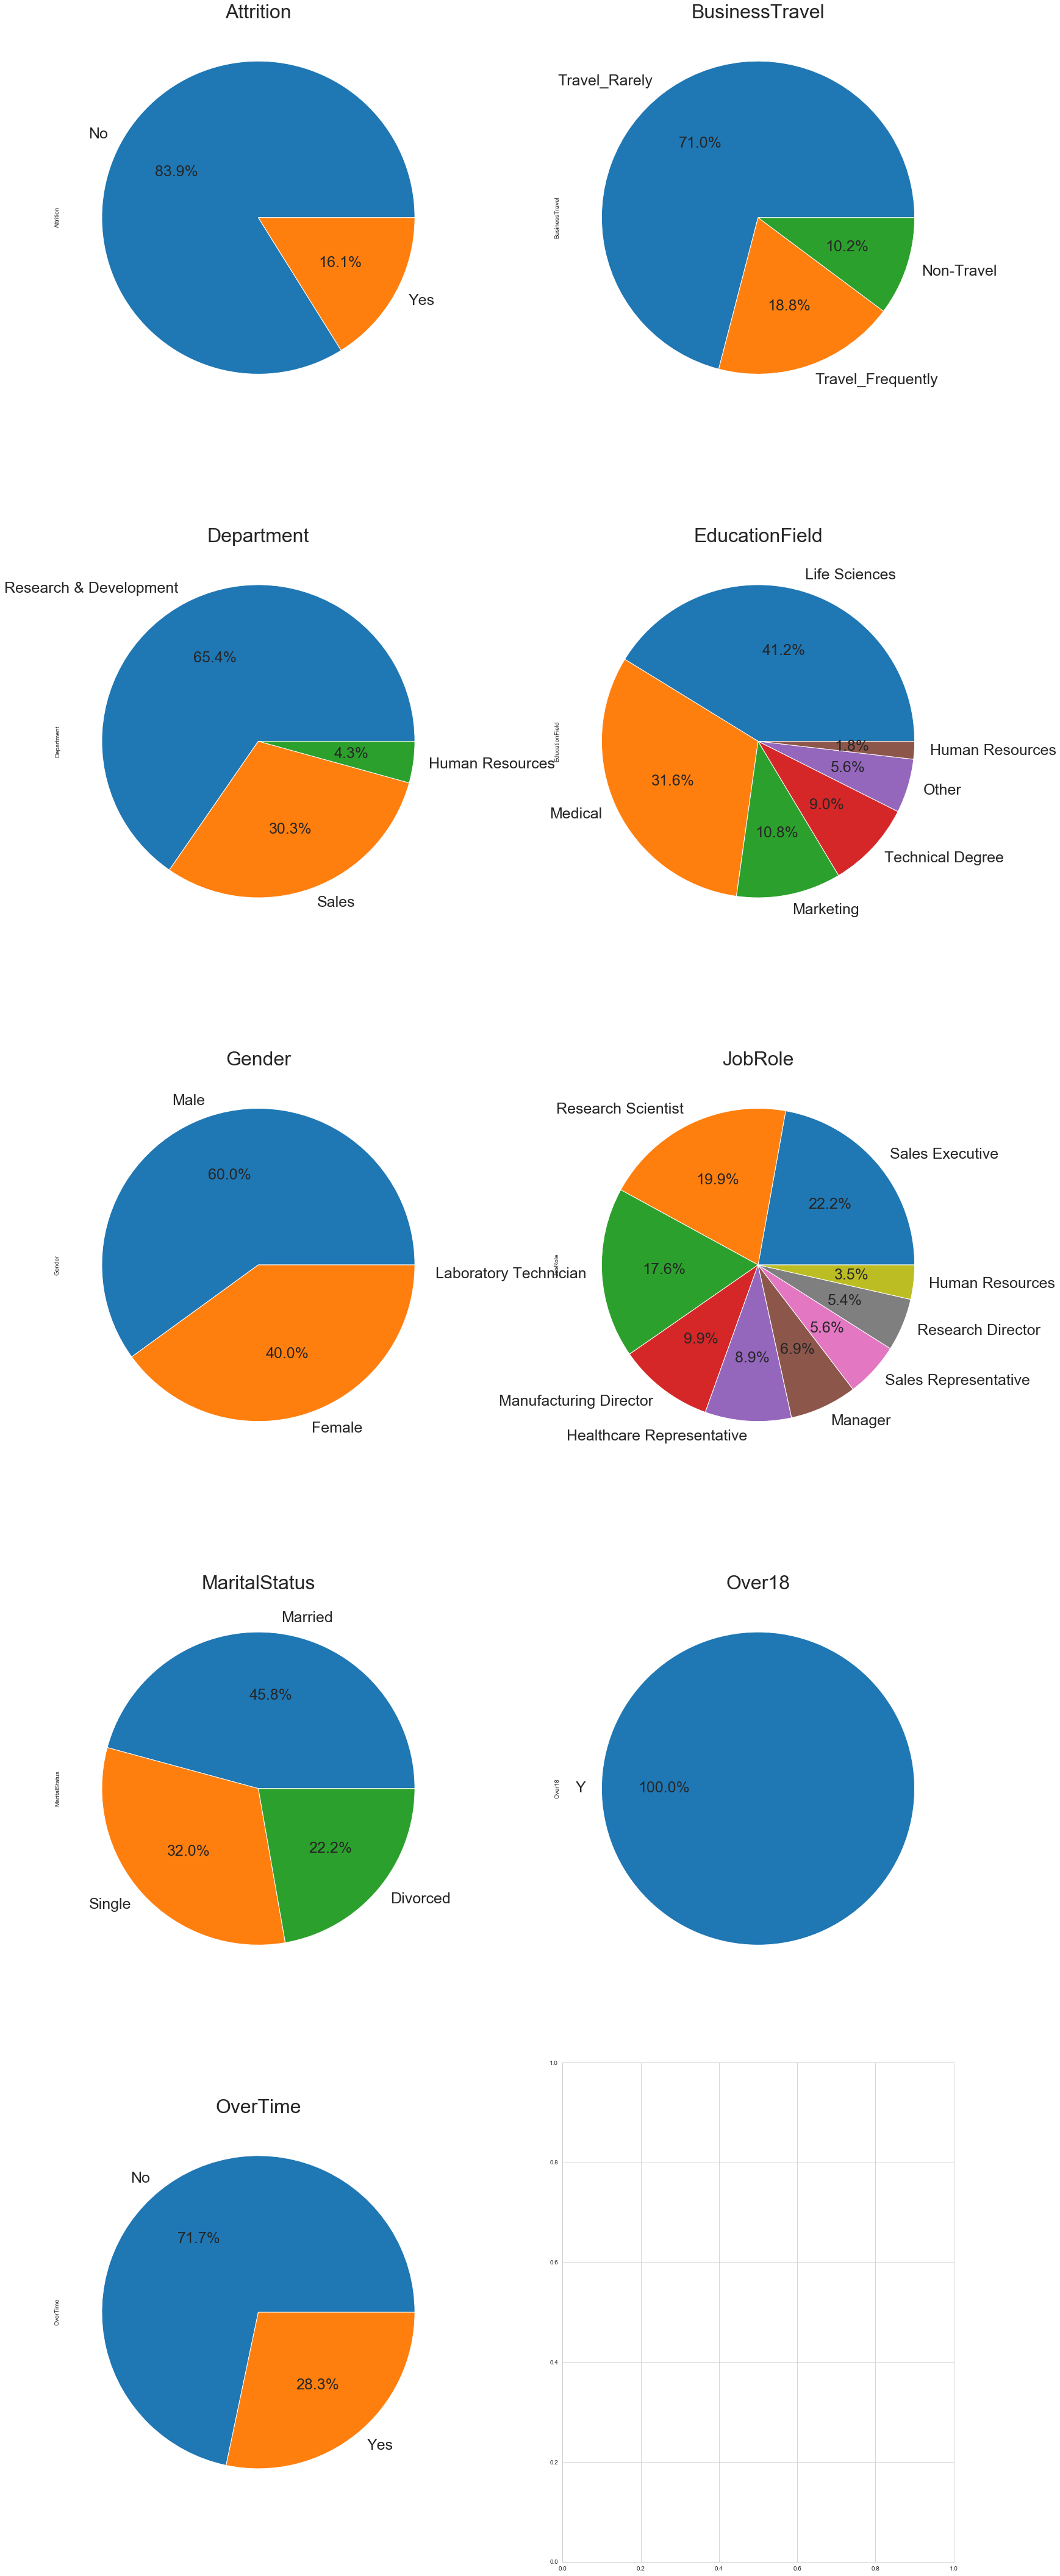

In [14]:
# plt.grid()
fig,axes = plt.subplots(5,2,figsize=(24,60))
axs = [ax for axes_row in axes for ax in axes_row]
for i,col in enumerate(cat_cols):
    sizes = df[col].value_counts()[::]
    labels = list(sizes.index)
#     plt.pie(sizes,labels=labels,autopct="%1.1f%",ax=axs[i])
    df[col].value_counts().plot(kind='pie',autopct="%1.1f%%",fontsize=25,ax=axs[i])
    axs[i].set_title(col,fontsize=32)
plt.tight_layout()

### Count plots

<Figure size 576x288 with 0 Axes>

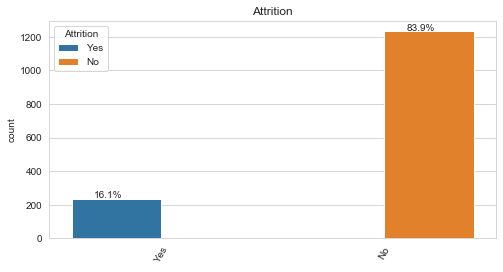

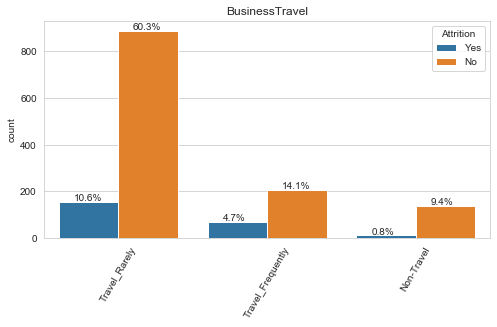

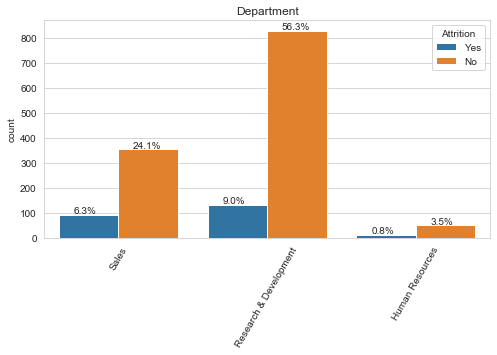

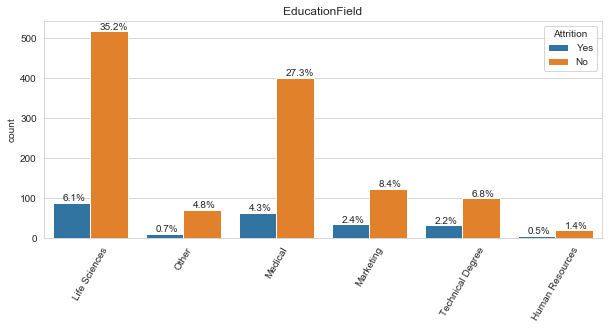

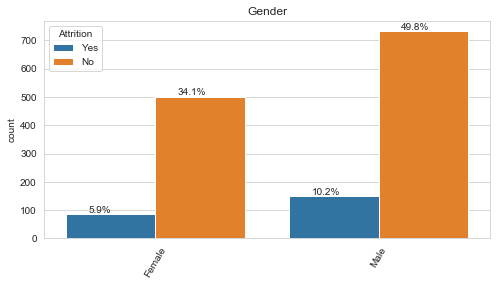

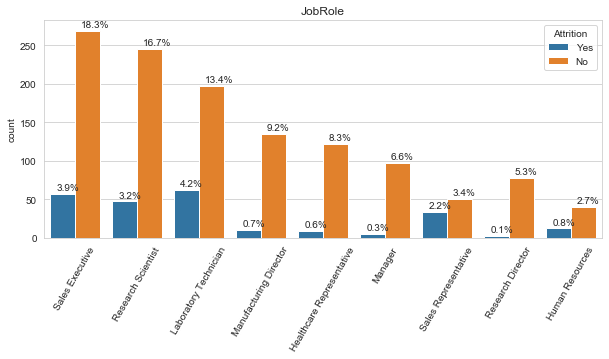

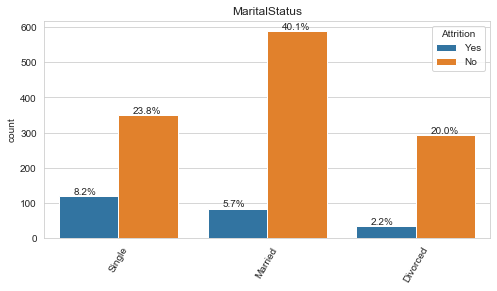

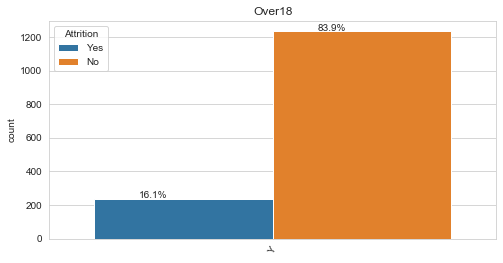

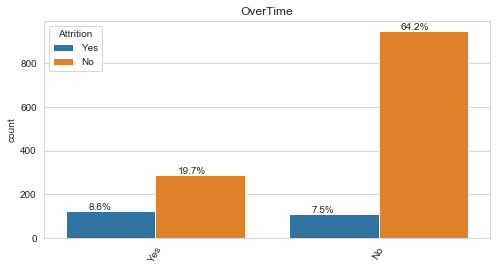

In [15]:
plt.figure(figsize=(8,4))
for col in cat_cols:
    if col in ['EducationField','JobRole']:
        plt.figure(figsize=(10,4))
    else:
         plt.figure(figsize=(8,4))
    ax = sns.countplot(df[col],hue=df[TARGET_COL])
    ax.set_xlabel('')
    ax.set_title(col)
    plt.xticks(rotation=60)
    
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/df.shape[0]*100), (p.get_x()+0.1, p.get_height()+5))
    plt.show()

In [16]:
print(cat_cols)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [17]:
factors_paired = [(i,j) for i in cat_cols for j in cat_cols ]

In [18]:
print(factors_paired)

[('Attrition', 'Attrition'), ('Attrition', 'BusinessTravel'), ('Attrition', 'Department'), ('Attrition', 'EducationField'), ('Attrition', 'Gender'), ('Attrition', 'JobRole'), ('Attrition', 'MaritalStatus'), ('Attrition', 'Over18'), ('Attrition', 'OverTime'), ('BusinessTravel', 'Attrition'), ('BusinessTravel', 'BusinessTravel'), ('BusinessTravel', 'Department'), ('BusinessTravel', 'EducationField'), ('BusinessTravel', 'Gender'), ('BusinessTravel', 'JobRole'), ('BusinessTravel', 'MaritalStatus'), ('BusinessTravel', 'Over18'), ('BusinessTravel', 'OverTime'), ('Department', 'Attrition'), ('Department', 'BusinessTravel'), ('Department', 'Department'), ('Department', 'EducationField'), ('Department', 'Gender'), ('Department', 'JobRole'), ('Department', 'MaritalStatus'), ('Department', 'Over18'), ('Department', 'OverTime'), ('EducationField', 'Attrition'), ('EducationField', 'BusinessTravel'), ('EducationField', 'Department'), ('EducationField', 'EducationField'), ('EducationField', 'Gender')

In [19]:
chi_values=[]
p_values=[]

In [20]:
for t in factors_paired:    
    chi = chi2_contingency(pd.crosstab(df[t[0]],df[t[1]]))
    chi_values.append(chi[0])
    p_values.append(chi[1])    

In [21]:
chi_values,p_values

([1462.6145539474094,
  24.182413685655174,
  10.79600732241067,
  16.024674119585423,
  1.1169671241970975,
  86.19025367670434,
  46.163676540848705,
  0.0,
  87.56429365828768,
  24.182413685655174,
  2940.0000000000005,
  0.20188511237510579,
  5.168393770035327,
  4.031372310350092,
  11.987695596739206,
  7.502066070448234,
  0.0,
  2.8537951052494166,
  10.79600732241067,
  0.20188511237510576,
  2940.0,
  1024.979247330766,
  2.9644916359463056,
  2594.428134158834,
  6.648506462812421,
  0.0,
  0.09360659979986957,
  16.024674119585427,
  5.168393770035328,
  1024.979247330766,
  7350.0,
  2.9414238793151797,
  864.7561976975342,
  9.585124618908559,
  0.0,
  1.7582460996841331,
  1.1169671241970975,
  4.031372310350092,
  2.9644916359463056,
  2.9414238793151797,
  1465.8362859032502,
  16.02987904654347,
  3.547839420682131,
  0.0,
  2.397257813640345,
  86.19025367670434,
  11.987695596739206,
  2594.4281341588335,
  864.756197697534,
  16.029879046543474,
  11760.0,
  26.9

In [22]:
p = np.array(p_values).reshape(9,9)

In [23]:
pd.DataFrame(p.round(2),index=cat_cols,columns=cat_cols)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
Attrition,0.00,0.00,0.00,0.01,0.29,0.00,0.00,1.0,0.00
BusinessTravel,0.00,0.00,1.00,0.88,0.13,0.74,0.11,1.0,0.24
Department,0.00,1.00,0.00,0.00,0.23,0.00,0.16,1.0,0.95
EducationField,0.01,0.88,0.00,0.00,0.71,0.00,0.48,1.0,0.88
Gender,0.29,0.13,0.23,0.71,0.00,0.04,0.17,1.0,0.12
JobRole,0.00,0.74,0.00,0.00,0.04,0.00,0.04,1.0,0.58
MaritalStatus,0.00,0.11,0.16,0.48,0.17,0.04,0.00,1.0,0.66
Over18,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00
OverTime,0.00,0.24,0.95,0.88,0.12,0.58,0.66,1.0,0.00


\\[ \sum_{} \\]

In [ ]:
pd.crosstab

In [ ]:
chi,p,dof,expected = chi2_contingency(pd.crosstab(df[f[0][0]],df[f[0][1]],margins=True))
chi

In [ ]:
len(chi)

In [ ]:
chi[0]

In [ ]:
f = factors_paired

In [ ]:
for t in enumerate(factors_paired):
    ift[i] != t[j]:
        

# END

In [ ]:
# # %matplotlib inline
# # fig,axes = plt.subplots(7,2,figsize=(25,25))
# # axs = [ax for axes_row in axes for ax in axes_row]
# # # num_cols=['YearsWithCurrManager']
# # ddfor i,col in enumerate(num_cols1):    
# # #     _ = sns.kdeplot(emp_attr[col],ax=axs[idx])
# #     _=emp_attr[col].plot(kind='density',ax=axs[i])
# #     axs[i].set_ylabel('')
# #     axs[i].set_xlabel(col)
    
# # plt.tight_layout()
# # plt.show()

# # %matplotlib inlineMM
# # fig,axes = plt.subplots(7,2,figsize=(25,25))
# # axs = [ax for axes_row in axes for ax in axes_row]
# # # num_cols=['YearsWithCurrManager']
# # for i,col in enumerate(num_cols2):    
# # #     _ = sns.kdeplot(emp_attr[col],ax=axs[idx])
# #     _=emp_attr[col].plot(kind='density',ax=axs[i])
# #     axs[i].set_ylabel('')
# #     axs[i].set_xlabel(col)
    
# # plt.tight_layout()
# # plt.show()

# emp_attr.dtypes.value_counts()

# cat_data = emp_attr.select_dtypes(include='object')

# cat_data.head()

# fig = plt.figure(figsize=(16,15))
# for i,col in enumerate(cat_data.columns):
#     plt.subplot(3,3,i+1)
#     ax = sns.countplot(cat_data[col])
#     for p in ax.patches:
#         ax.annotate('{:.1f}%'.format(p.get_height()/emp_attr.shape[0]*100), (p.get_x()+0.4, p.get_height()+5))

# plt.tight_layout()    
# plt.show()    

# emp_attr.shape[0]

# emp_attr['Over18'].value_counts()

# emp_attr['Over18'].describe

# 237/1470

# sns.set_style('whitegrid')
# ax = sns.countplot(emp_attr['Attrition'])
# # ax.set_yticks(np.arange(0, 110, 10))
# for p in ax.patches:
#         print(p.get_height())
#         ax.annotate('{:.1f}%'.format(p.get_height()/emp_attr.shape[0]*100), (p.get_x()+0.4, p.get_height()+5))
# #         ax.annotate('{.1f}%'.format(p.get_height()/emp_attr.shape[0]), (p.get_x()+0.4, p.get_height()+5))
        
# # ax2 = ax.twinx()
# # ax2.set_yticks(np.arange(0, 110, 10)*len(emp_attr)/100)
# # plt.legend(True)        
# plt.tight_layout()        

# # values.values

# values = emp_attr['Attrition'].value_counts()[::]
# labels='No','Yes'

# # help(plt.pie)
# plt.figure(figsize=(16,8))
# plt.pie(values,labels=labels,autopct='%1.1f%%')
# plt.show()